### Import modules

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import MaxNLocator
from datetime import datetime, date, time
import seaborn as sns

### Input data and correlation index for manager ID and the given performance score (PIP, Needs Improvement, Fully Meets, Exceeds)

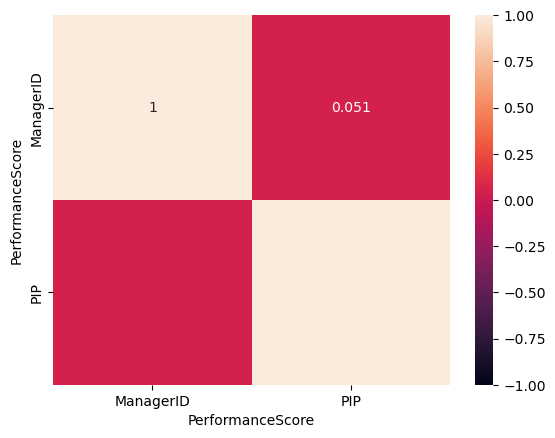

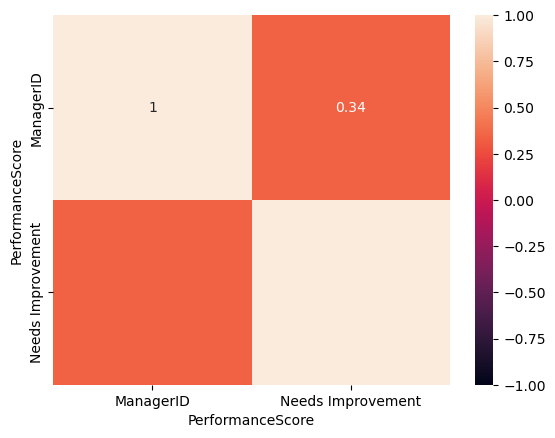

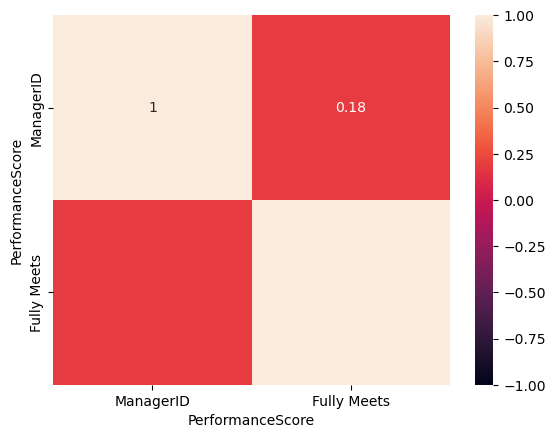

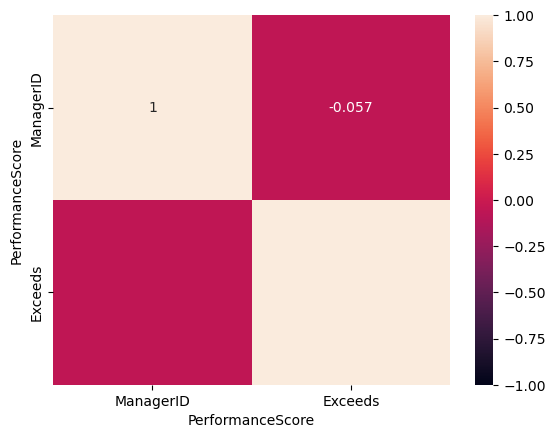

In [74]:
df = pd.read_csv('HRDataset.csv')
df_test=df.pivot_table(index=df['ManagerID'],columns=df['PerformanceScore'],values='PerformanceScore',aggfunc='count').fillna(0)
df_test=df_test.reset_index()
sns.heatmap(df_test[['ManagerID', 'PIP']].corr(), vmin=-1, vmax=1, annot=True)
plt.show()
sns.heatmap(df_test[['ManagerID', 'Needs Improvement']].corr(), vmin=-1, vmax=1, annot=True)
plt.show()
sns.heatmap(df_test[['ManagerID', 'Fully Meets']].corr(), vmin=-1, vmax=1, annot=True)
plt.show()
sns.heatmap(df_test[['ManagerID', 'Exceeds']].corr(), vmin=-1, vmax=1, annot=True)
plt.show()

#### There is no pronounced correlation between the manager ID and the performance score.

### Calculating the time the employees stay at the company to find out the best method of recruitment to keep the employees

In [75]:
df['DateofTermination'] = df['DateofTermination'].fillna('09/27/19')
df['DateofHire']=df['DateofHire'].apply(pd.to_datetime,format='%m/%d/%Y') 
df['DateofTermination'] = df['DateofTermination'].apply(pd.to_datetime,format='%m/%d/%y')
df['days'] = (df['DateofTermination'] - df['DateofHire']).dt.days

### Answering the question about the best recruitment method

In [76]:
f"{df.groupby(['RecruitmentSource']).size().idxmax()} {df.groupby(['RecruitmentSource'])['days'].sum().max()}"

'Employee Referral 56907.0'

#### The best method to keep the employees is Employee Referral (overall 56907 days of staying at the company).

### Correlation between being married or a single and the satisfaction

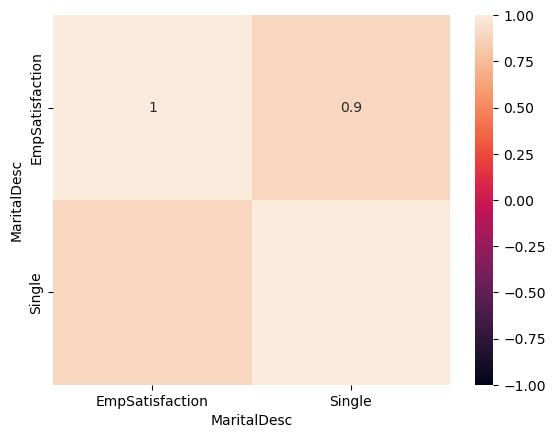

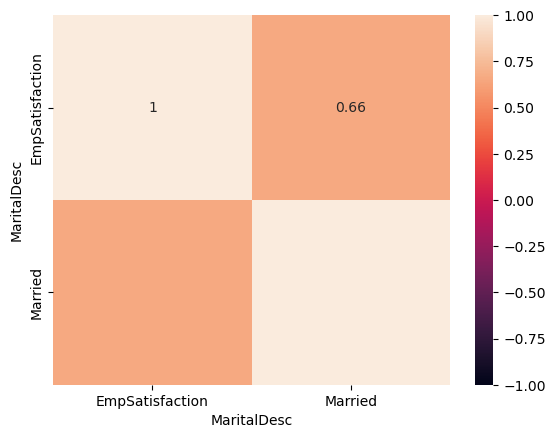

MaritalDesc,EmpSatisfaction,Divorced,Married,Separated,Single,Widowed
0,1.0,0.0,0.0,1.0,1.0,0.0
1,2.0,1.0,5.0,0.0,3.0,0.0
2,3.0,6.0,54.0,4.0,44.0,0.0
3,4.0,14.0,31.0,2.0,40.0,6.0
4,5.0,9.0,33.0,5.0,49.0,2.0


In [77]:
df_new = pd.read_csv('HRDataset.csv')
df_clean=df_new[["EmpSatisfaction","MaritalDesc"]].dropna()
df_clean=df_new.pivot_table(index=df_clean['EmpSatisfaction'],columns=df_clean['MaritalDesc'],values='EmpSatisfaction',aggfunc='count').fillna(0)
df_clean=df_clean.reset_index()
sns.heatmap(df_clean[['EmpSatisfaction', 'Single']].corr(), vmin=-1, vmax=1, annot=True)
plt.show()
sns.heatmap(df_clean[['EmpSatisfaction', 'Married']].corr(), vmin=-1, vmax=1, annot=True)
plt.show()
df_clean

#### There is a strong correlation between being a single and being quite satisfied with the job in contrast to being married. Singles are more likely to provide higher satisfaction scores according to the data. Furthermore, the other categories have a low data count (as seen above) and are therefore excluded from the analysis.

### Working with the data to get the age distribution of the employees

In [78]:
df_new[['DOB']] = df_new[['DOB']].apply(pd.to_datetime,format='%m/%d/%y') 
date = date(2019,9,27)
set_time = time(12, 0, 0)
date_time = datetime.combine(date,set_time)
df_new['years'] = (date_time - df_new['DOB']).dt.days
df_new=df_new.dropna(subset=['years'])
df_new['years']=round(df_new['years']/365,0)
df_new_years=df_new['years']
df_new_years=df_new_years.to_numpy()
df_new_years_2=df_new['years']
df_new_years_2=df_new_years_2.to_frame()
df_new_years_2['years'] = df_new_years_2.apply(lambda row: row+100 if int(row.iloc[0])<0  else row,axis=1)


### Visualizing the age distribution of the employees as a histogram

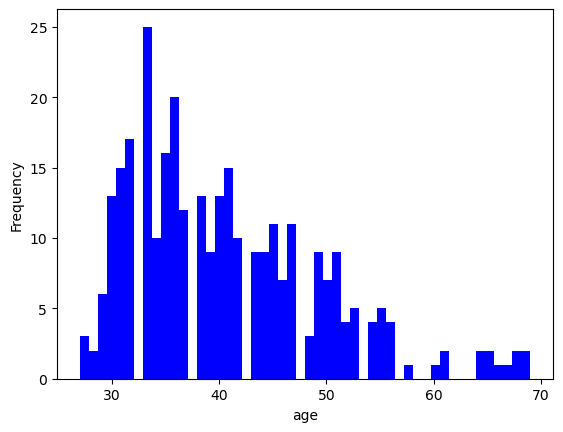

In [79]:
df_new_years_2['years'].plot(kind='hist',bins=50,color='b',xlabel="age").locator_params(axis='y', integer=True)
plt.show()

#### Most of the employees are between 30 and about 40 years old.

### Visualizing the age dependency of the amount of special projects

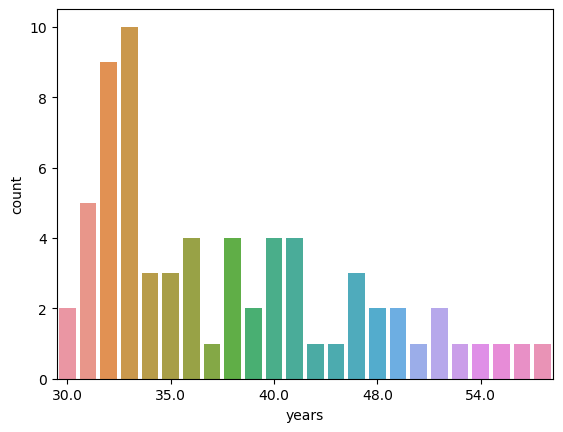

In [80]:
df_new['years'] = df_new['years'].apply(lambda row: round(row+100,0) if row<0  else round(row,0))
df_new_2=df_new.pivot_table(index=df_new['years'],columns=df_new['SpecialProjectsCount'],values='SpecialProjectsCount',aggfunc='count').fillna(0)
df_new_2
df_new_2=df_new_2.reset_index()
df_new_2=df_new_2.drop(df_new_2.columns[1],axis=1)
df_new_2["count"]=df_new_2.iloc[2:].sum(axis='columns')-df_new_2['years']
df_new_2=df_new_2[(df_new_2['count'] != 0)]
df_new_2.dropna(inplace=True)
age_plot=sns.barplot(x='years',y='count',data=df_new_2)
age_plot.xaxis.set_major_locator(ticker.MultipleLocator(5))
plt.show()

#### The younger employees have a higher number of special projects.